Customer Churn
It is when an existing customer, user, subscriber, or any kind of return client stops doing business or ends the relationship with a company.

Types of Customer Churn –

    Contractual Churn : When a customer is under a contract for a service and decides to cancel the service e.g. Cable TV, SaaS.
    Voluntary Churn : When a user voluntarily cancels a service e.g. Cellular connection.
    Non-Contractual Churn : When a customer is not under a contract for a service and decides to cancel the service e.g. Consumer Loyalty in retail stores.
    Involuntary Churn : When a churn occurs without any request of the customer e.g. Credit card expiration.
    
    
Reasons for Voluntary Churn

    Lack of usage
    Poor service
    Better price

In [12]:
# Import required libraries
import numpy as np
import pandas as pd

# Import the dataset
dataset = pd.read_csv('telcochurndata.csv')

# Glance at the first five records
dataset.head()

# Print all the features of the data
dataset.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [37]:
dataset.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [77]:
dataset.drop(['phone number'], axis=1, inplace=True)

In [78]:
# Churners vs Non-Churners
dataset['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [79]:
# Group data by 'Churn' and compute the mean
print(dataset.groupby('churn')['customer service calls'].mean())

churn
False    1.449825
True     2.229814
Name: customer service calls, dtype: float64


In [80]:
# Count the number of churners and non-churners by State
print(dataset.groupby('state')['churn'].value_counts())

state  churn
AK     False    49
       True      3
AL     False    72
       True      8
AR     False    44
                ..
WI     True      7
WV     False    96
       True     10
WY     False    68
       True      9
Name: churn, Length: 102, dtype: int64


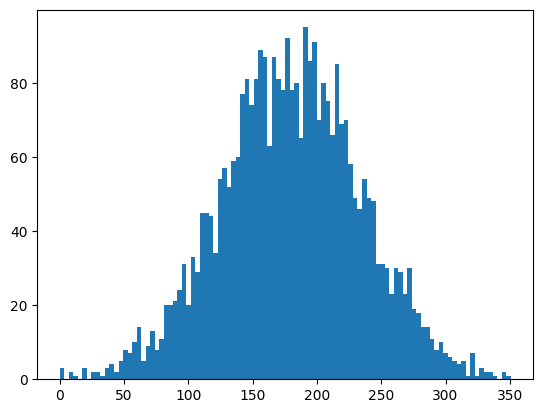

In [81]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
  
# Visualize the distribution of 'Total day minutes'
plt.hist(dataset['total day minutes'], bins = 100)
  
# Display the plot
plt.show()

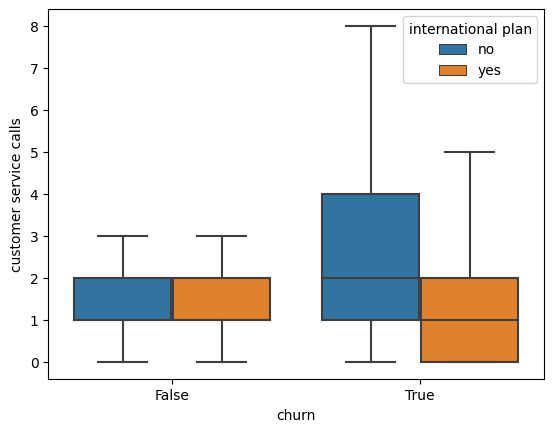

In [82]:
# Create the box plot
sns.boxplot(x = 'churn',
            y = 'customer service calls',
            data = dataset,
            sym = "",                  
            hue = "international plan") 
# Display the plot
plt.show()

In [87]:
# X = dataset.iloc[:, 0:19].values
# X[:, 5]

In [88]:
# Features and Labels
X = dataset.iloc[:, 0:19].values
y = dataset.iloc[:, 19].values # Churn

# Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder

labelencoder_X_1 = LabelEncoder()
X[:, 3] = labelencoder_X_1.fit_transform(X[:, 3])

labelencoder_X_2 = LabelEncoder()
X[:, 4] = labelencoder_X_2.fit_transform(X[:, 4])

# Encoding categorical data in y
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [89]:
# Removing extra column to avoid dummy variable trap
X_State = pd.get_dummies(X[:, 0], drop_first = True)
  
# Converting X to a dataframe
X = pd.DataFrame(X)
  
# Dropping the 'State' column
X = X.drop([0], axis = 1)
  
# Merging two dataframes
frames = [X_State, X]
result = pd.concat(frames, axis = 1, ignore_index = True)
  
# Final dataset with all numeric features
X = result

In [90]:
# Splitting the dataset into the Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [91]:
pd.set_option('display.max_columns', None)  # or 1000
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
1460,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,415,0,0,0,198.1,160,33.68,156.7,87,13.32,182.1,76,8.19,9.3,3,2.51,3
2000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,28,415,0,0,0,168.2,87,28.59,161.7,92,13.74,192.4,112,8.66,10.1,3,2.73,3
666,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,120,415,0,0,0,252.0,120,42.84,150.2,106,12.77,151.8,96,6.83,9.6,1,2.59,2
2962,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,105,415,0,0,0,251.6,88,42.77,175.1,103,14.88,184.4,112,8.3,5.4,5,1.46,1
2773,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,134,510,0,1,34,247.2,105,42.02,225.5,133,19.17,186.3,76,8.38,6.1,5,1.65,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,510,0,0,0,72.7,75,12.36,208.6,117,17.73,65.8,71,2.96,9.9,3,2.67,1
3264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,89,415,0,1,24,97.8,98,16.63,207.2,67,17.61,214.5,126,9.65,5.9,2,1.59,0
1653,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93,510,1,0,0,131.4,78,22.34,219.7,106,18.67,155.7,103,7.01,11.1,2,3.0,1
2607,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,91,415,0,0,0,189.3,100,32.18,239.3,107,20.34,89.7,89,4.04,9.9,3,2.67,3


In [92]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [93]:
X_train

array([[-0.15557263, -0.13396186, -0.13540534, ..., -0.60566687,
        -0.33633574,  1.09712515],
       [-0.15557263, -0.13396186, -0.13540534, ..., -0.60566687,
        -0.04666226,  1.09712515],
       [-0.15557263, -0.13396186, -0.13540534, ..., -1.42552363,
        -0.23099993,  0.33819011],
       ...,
       [-0.15557263, -0.13396186, -0.13540534, ..., -1.01559525,
         0.3088461 , -0.42074493],
       [-0.15557263, -0.13396186, -0.13540534, ..., -0.60566687,
        -0.12566412,  1.09712515],
       [-0.15557263, -0.13396186, -0.13540534, ..., -1.01559525,
         2.36289441,  2.61499524]])

In [94]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)


RandomForestClassifier()

In [95]:
# Predict the labels for the test set
y_pred = clf.predict(X_test)


In [96]:
# Compute accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.952023988005997

In [97]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[576   3]
 [ 29  59]]
